## Part 0

### Lab 01 - Elementary Python Tasks

Count the number of rows in the csv file you've chosen.

In [41]:
import csv     # imports the csv module
import sys  
f = open('/Users/aqsa/Desktop/TB_burden_countries_2014-09-29.csv') # opens the csv file
rowCount = 0 # declare a variable to keep the row count value
for row in csv.reader(f):
    rowCount += 1
print("There are ", rowCount , "rows in this dataset.")

There are  4904 rows in this dataset.


Pick one of the columns with numeric data and calculate the average value using a loop (not a library function such as avg(), we'll come to those soon). One candidate is the column with the name "e_prev_num_lo" which is "Estimated prevalence of TB (all forms), low bound" according to the dictionary here. 

In [43]:
# A very crude way of getting averages along a column
# but hang on, we'll be doing more efficient operations soon

rowCount = 0 # declare a variable to keep the row count value
totalValue = 0 # declare a variable to keep the column total

f = open('/Users/aqsa/Desktop/TB_burden_countries_2014-09-29.csv') # opens the csv file

l = next(f) # This comment skips the column headers since we don't want them in our averaging. We might do something with the header line if we wanted to.
colHeaders = l.split(',') # we split the col names string since they are comma separated.

# This is not really needed but makes it easier to find the column names
# uncomment to run

#for i, colName in enumerate(colHeaders):
#    print ("Column: ", i, " is ",colName)


# Let's compute the average for e_prev_num_lo which has a column id 11.
# notice that although this is the 12th column, we'll get its values by referencing to the 11th.
# computers count from 0 unlike us humans !!

for row in csv.reader(f):

    # We need to be careful here since we need to convert the csv data which are originally strings.
    # Most of the time there are problems in the data, such as gaps, missing values, etc.
    # If you look at the spreadsheet, you'll notice some empty cells.
    # The try-except struct makes sure that those empty cells are skipped and our code don't crash.
    try:
        val = float(row[11])
        totalValue += val
        # Note here that we also moved the counter for rows inside the try/catch routine
        # this is to ensure that we do not add the empty rows to the count
        rowCount += 1
    except ValueError:
        pass
    
# Here we're checking to make sure that we are trying to divide by zero.
if rowCount > 0:
    columnAverage = totalValue / rowCount    
    print("Column Average:", columnAverage)

Column Average: 43661.05531071133


Now, repeat step-2 above but this time find the averages for years 1990 and 2011. Have you observed any difference?

In [44]:

rowCount1990 = 0 # declare a variable to keep the row count value for the rows dated 1990
total1990 = 0 # declare a variable to keep the total number of rows in 1990

rowCount2011 = 0 # declare a variable to keep the row count value for the rows dated 2011
total2011 = 0  # declare a variable to keep the total number of rows in 2011

f = open('/Users/aqsa/Desktop/TB_burden_countries_2014-09-29.csv') # opens the csv file

l = next(f) # This comment skips the column headers since we don't want them in our averaging. We might do something with the header line if we wanted to.
colHeaders = l.split(',') # we split the col names string since they are comma separated.


#  e_prev_num_lo is column id 11, year is column id 5

for row in csv.reader(f):
    
    try:
        year = int(row[5])        
    except ValueError:
        continue 
        # this makes sure that if there is no year (i.e., missing), we stop this iteration 
        #and move on the the next line, so the code below don't run in this case  
    
    try:
        val = float(row[11])        
    except ValueError:
        continue
    # Here we use an if clause to make sure that we are using the correct years.
    if year == 1990:
        total1990 += val
        rowCount1990 += 1
        
    elif year == 2011:
        total2011 += val
        rowCount2011 += 1

if rowCount1990 > 0:
    columnAverage = total1990 / rowCount1990
    print("Average for 1990:", columnAverage, " with ", rowCount1990, " data points."  )

if rowCount2011 > 0:
    columnAverage = total2011 / rowCount2011
    print("Average for 2011:", columnAverage, " with ", rowCount2011, " data points."  )




Average for 1990: 44379.73417061612  with  211  data points.
Average for 2011: 33320.0524537037  with  216  data points.


## Part 1: Pandas basics

In [5]:
import pandas as pd
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s
# specify an index to use when creating the Series
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s
print(s.iloc[1] )# Access using index location
s['Z'] # Access using label

Heisenberg


'Heisenberg'

converting from dictionary to series - benefits include easier to compute larger datasets this way

In [6]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities
print (cities.isnull())

Chicago          False
New York         False
Portland         False
San Francisco    False
Austin           False
Boston            True
dtype: bool


Access by index ver 1 0     5
1     8
2     6
3     1
4     5
5    10
6     6
7    12
Name: losses, dtype: int64
Access by index ver 2 0     5
1     8
2     6
3     1
4     5
5    10
6     6
7    12
Name: losses, dtype: int64
   year     team  wins  losses
0  2010    Bears     7       5
1  2011    Bears     7       8
2  2012    Bears     7       6
3  2011  Packers     7       1
4  2012  Packers     7       5
5  2010    Lions     7      10
6  2011    Lions     7       6
7  2012    Lions     7      12
Minimum wins:  7
              year  wins     losses
count     8.000000   8.0   8.000000
mean   2011.125000   7.0   6.625000
std       0.834523   0.0   3.377975
min    2010.000000   7.0   1.000000
25%    2010.750000   7.0   5.000000
50%    2011.000000   7.0   6.000000
75%    2012.000000   7.0   8.500000
max    2012.000000   7.0  12.000000
year       int64
team      object
wins       int64
losses     int64
dtype: object


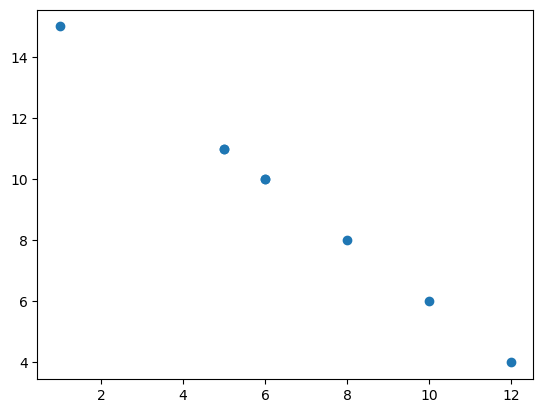

In [10]:
import matplotlib.pyplot as plt

data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
print ("Access by index ver 1", football['losses'])
print ("Access by index ver 2", football.losses)



#Now plot with pandas
plt.scatter(football.losses, football.wins)

# modify the data
football['wins'] = 7
print (football)

# you can easily get basic information on your data
print ("Minimum wins: ", football['wins'].min()) # gets you the minimum of a column
# for a quick look at summary statistics, the following is helpful
print(football.describe())
# wen you run this, notice that "year" column is not listed. This is due to data types which you can check by
print(football.dtypes)

Slicing the Pandas DataFrame

In [11]:
football[2:5] # This will get you the rows from 3 to 5
football[['year', 'wins']] # another way (not slicing) to get multiple columns
football.iloc[[3, 1]] # or this
football['year'][2:5] # This will get you the rows 3 to 5 but only for the year column


2    2012
3    2011
4    2012
Name: year, dtype: int64

In [12]:
football[football.year > 2011] # gets you only the information 2012 and onwards
# can build even more complex queries by combining using logical operators, | (OR), & (AND)
football[(football.wins > 5) & (football.losses < 5)] # gets you those teams with less than 5 losses and more than 5 wins

,year,team,wins,losses
3,2011,Packers,7,1


In [18]:
# now create two data frames

left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
#check what is inside
print (left_frame)
print (right_frame)

# now merge these data frames based on the 'key' field -- a common task when merging data sources
print ("--- An inner join:")
print (pd.merge(left_frame, right_frame, on='key'))
# Now add a new element to the left_frame with a key value 2 and assign it to a new variable


   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e
   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j
--- An inner join:
   key left_value right_value
0    2          c           f
1    3          d           g
2    4          e           h


In [17]:
new_row = pd.DataFrame({'key': [2], 'left_value': ['nv']}) 

In [19]:
left_frame_new = pd.concat([left_frame, new_row], ignore_index=True)
# and now try merging the new array
print (pd.merge(left_frame_new, right_frame, on='key'))
# different types of merging are possible
print ("--- Now a left outer join:")
print (pd.merge(left_frame, right_frame, on='key', how='left')) # notice the NAN values - reflect on why they exist

   key left_value right_value
0    2          c           f
1    3          d           g
2    4          e           h
3    2         nv           f
--- Now a left outer join:
   key left_value right_value
0    0          a         NaN
1    1          b         NaN
2    2          c           f
3    3          d           g
4    4          e           h


### the NaN values probably occur from the type of join that we are doing. left joins take all the values on the lest even though there might not be a match on the right graph

# Exercises (DIY) - Part 1

Download the two files and load them into pandas data frames. Hint: have a look at this page and do not forget to parse your excel sheet into a data frame.

In [31]:
import pandas as pd

data1 = pd.read_csv('/Users/aqsa/Desktop/passengerData.csv')
data2 = pd.read_excel('/Users/aqsa/Desktop/ticketPrices.xlsx')
data1.columns

#passengers = pd.Dataframe(data1)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'TicketType'],
      dtype='object')

In [33]:
data2.columns

Index(['TicketType', 'Fare'], dtype='object')

Merge the two files based on the column they share. (tickettype)

In [37]:
merged = pd.merge(data1, data2, on='TicketType')
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,TicketType,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,33
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,56
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,3,77
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4,22
4,5,0,3,"Allen, Mr. William Henry",male,35.0,5,14


Display the name of the oldest passengers (hint: make use of variables to save some intermediate values).

In [58]:
oldest_age = oldest_age = merged['Age'].max()
name_of_oldest = merged[merged['Age'] == oldest_age]['Name']
print(name_of_oldest)

630    Barkworth, Mr. Algernon Henry Wilson
Name: Name, dtype: object


In [59]:

sorted_by_age = merged.sort_values(by='Age', ascending=False)


name_of_oldest = sorted_by_age['Name']

print(name_of_oldest)


630        Barkworth, Mr. Algernon Henry Wilson
851                         Svensson, Mr. Johan
493                     Artagaveytia, Mr. Ramon
96                    Goldschmidt, Mr. George B
116                        Connors, Mr. Patrick
                         ...                   
859                            Razi, Mr. Raihed
863           Sage, Miss. Dorothy Edith "Dolly"
868                 van Melkebeke, Mr. Philemon
878                          Laleff, Mr. Kristo
888    Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 891, dtype: object


Plot the data on a scatter plot that shows the Age vs. Ticket Prices

Text(0, 0.5, 'Ticket Prices')

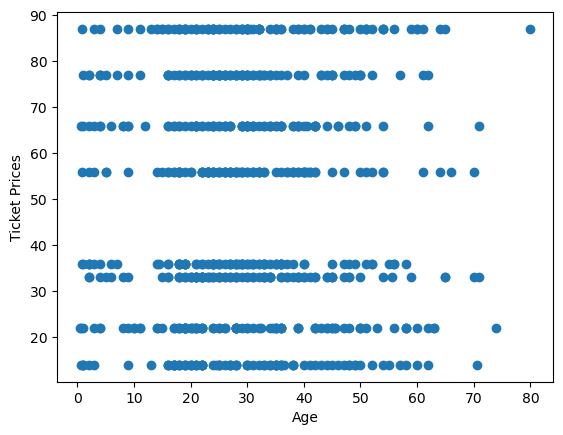

In [61]:
import matplotlib.pyplot as plt

plt.scatter(merged.Age , merged.Fare)
plt.xlabel('Age')
plt.ylabel('Ticket Prices')

Plot only the data that shows female passengers aged 40 to 50 and who paid more than or equal to 40.

In [74]:
filter = merged[(merged['Sex'] == 'female') & (merged['Age'].between(40, 50)) & (merged['Fare'] >= 40)]
print(filter.head())
plt.bar

     PassengerId  Survived  Pclass  \
161          162         1       2   
177          178         0       1   
194          195         1       1   
254          255         0       3   
337          338         1       1   

                                                  Name     Sex   Age  \
161  Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  female  40.0   
177                         Isham, Miss. Ann Elizabeth  female  50.0   
194          Brown, Mrs. James Joseph (Margaret Tobin)  female  44.0   
254           Rosblom, Mrs. Viktor (Helena Wilhelmina)  female  41.0   
337                    Burns, Miss. Elizabeth Margaret  female  41.0   

     TicketType  Fare  
161           2    56  
177           2    56  
194           3    77  
254           7    87  
337           2    56  


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [79]:
filtered_df = merged.query("Sex == 'female' and Age >= 40 and Age <= 50 and Fare >= 40")
print(filtered_df.head(3))

     PassengerId  Survived  Pclass  \
161          162         1       2   
177          178         0       1   
194          195         1       1   

                                                  Name     Sex   Age  \
161  Watt, Mrs. James (Elizabeth "Bessie" Inglis Mi...  female  40.0   
177                         Isham, Miss. Ann Elizabeth  female  50.0   
194          Brown, Mrs. James Joseph (Margaret Tobin)  female  44.0   

     TicketType  Fare  
161           2    56  
177           2    56  
194           3    77  


 # Part 2: Missing values

A DataFrame is created with random values and custom indexing.
Two new columns are added ('four' and 'five').
The DataFrame is reindexed, introducing missing values (NaN) for new rows ('b', 'd', 'g').
Missing values in the 'one' column of the reindexed DataFrame are checked using pd.isnull().


In [81]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0
# Here we are generating some missing values artificially 
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
# use this function to get an overview of the nul values along a column
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

## DIY Exercises - 2 : Missing values

### Load the slightly modified Titanic survival data (right-click and "save link as") into a pandas data frame.

In [35]:
import pandas as pd
file = pd.read_csv('/Users/aqsa/Desktop/titanicSurvival_m.csv')
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Find the counts of missing values in each column

In [36]:
file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare            46
Cabin          687
Embarked         2
dtype: int64

### Compute the mean and other descriptive statistics and note these down, you can use this function

In [37]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,845.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.304319
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.792612
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Replace the missing values in "Age" and "Fare" columns with 0 values, and visualise in a scatterplot

/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_37040/172117352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file.Fare.fillna(0, inplace=True)


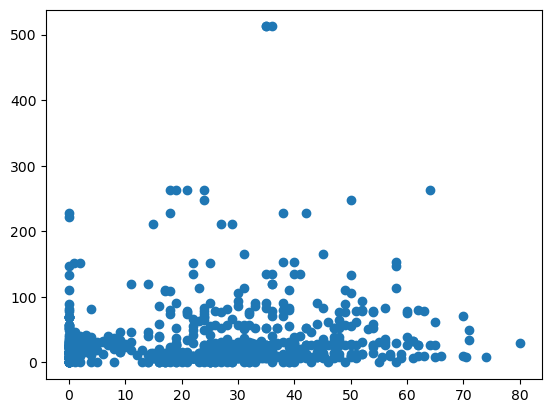

In [24]:
file.Age.fillna(0, inplace=True)
file.Fare.fillna(0, inplace=True)
file.isnull().sum()

import matplotlib.pyplot as plt

plt.scatter(file.Age, file.Fare)

### Replace the missing values in "Age" and "Fare" columns with the mean of each column, and visualise in a scatterplot

/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_37040/3996712878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  file.Age.fillna(file.Age.mean(), inplace=True)
/var/folders/f3/9rjb9s3d5095pp6w66p1r_kc0000gn/T/ipykernel_37040/3996712878.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

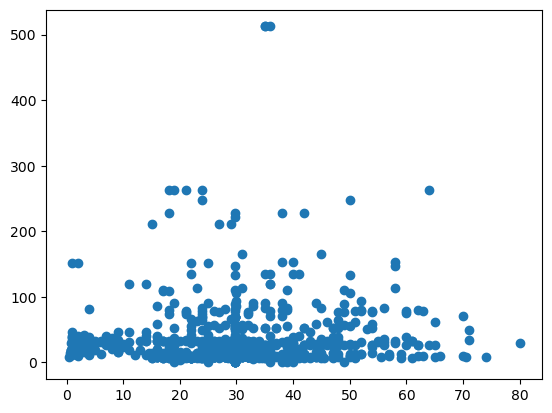

In [38]:
file.Age.mean()
file.Fare.mean()
file.Age.fillna(file.Age.mean(), inplace=True)
file.Fare.fillna(file.Fare.mean(), inplace=True)


import matplotlib.pyplot as plt

plt.scatter(file.Age, file.Fare)

### Reflect on the differences you see in these plots.

You'll likely notice that many data points are clustered along the axes at (0, Fare) or (Age, 0), especially around very low values of "Age" and "Fare". This may distort the overall trend, as replacing missing data with 0s introduces non-representative data points.
When missing values are replaced by the mean, the scatterplot should look more consistent. The points will likely distribute more evenly, as missing values are filled with the central tendency (mean). This provides a more realistic view of the data compared to filling with 0.


# DIY Exercises - 3 : Data Transformations

## load the file from last week. You may need to replace missing values before you start.

In [55]:
import csv     # imports the csv module
import sys  
f = open('/Users/aqsa/Desktop/TB_burden_countries_2014-09-29.csv')

df = pd.read_csv(f)

df.head()

#print(df.isna().sum())

df.fillna(0,inplace=True)

print(df.isna().sum())

country                     0
iso2                        0
iso3                        0
iso_numeric                 0
g_whoregion                 0
year                        0
e_pop_num                   0
e_prev_100k                 0
e_prev_100k_lo              0
e_prev_100k_hi              0
e_prev_num                  0
e_prev_num_lo               0
e_prev_num_hi               0
e_mort_exc_tbhiv_100k       0
e_mort_exc_tbhiv_100k_lo    0
e_mort_exc_tbhiv_100k_hi    0
e_mort_exc_tbhiv_num        0
e_mort_exc_tbhiv_num_lo     0
e_mort_exc_tbhiv_num_hi     0
source_mort                 0
e_inc_100k                  0
e_inc_100k_lo               0
e_inc_100k_hi               0
e_inc_num                   0
e_inc_num_lo                0
e_inc_num_hi                0
e_tbhiv_prct                0
e_tbhiv_prct_lo             0
e_tbhiv_prct_hi             0
e_inc_tbhiv_100k            0
e_inc_tbhiv_100k_lo         0
e_inc_tbhiv_100k_hi         0
e_inc_tbhiv_num             0
e_inc_tbhi

## Choose a number of columns with different shapes, for instance, "e_prev_100k_hi" is right skewed and visualise on an histogram

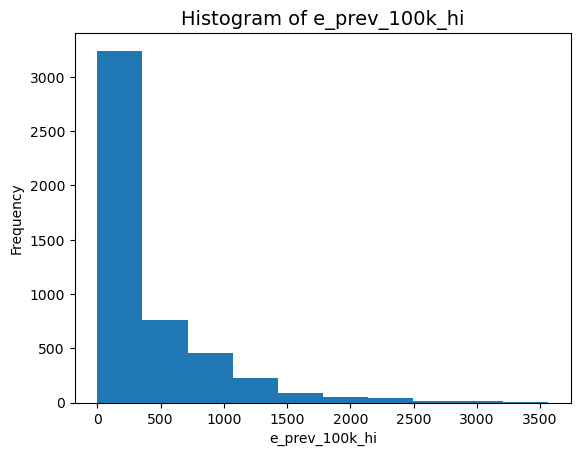

In [58]:
#df.head(50) used this to see what they mean by right skewed
import matplotlib.pyplot as plt

plt.hist(df.e_prev_100k_hi)

plt.title('Histogram of e_prev_100k_hi', fontsize=14)
plt.xlabel('e_prev_100k_hi')
plt.ylabel('Frequency')
plt.show()

## Apply a log transformation on the data. Numpy has a log function. and visualise. Observe the changes

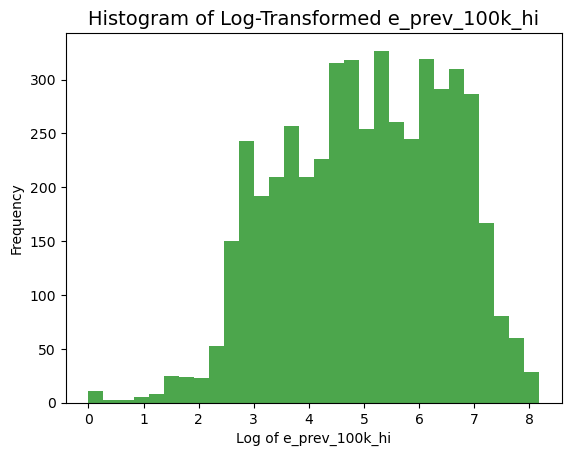

In [62]:
import numpy as np

df['e_prev_100k_hi_log'] = np.log1p(df['e_prev_100k_hi'])
plt.hist(df['e_prev_100k_hi_log'], bins=30, alpha=0.7, color='green')
#plt.hist(df['e_prev_100k_hi_log'])
plt.title('Histogram of Log-Transformed e_prev_100k_hi', fontsize=14)
plt.xlabel('Log of e_prev_100k_hi')
plt.ylabel('Frequency')
plt.show()

## Choose the numerical columns and map all the columns to [0,1] interval

In [63]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Min-Max scaling
df_normalized = df[numerical_cols].copy()
df_normalized = (df_normalized - df_normalized.min()) / (df_normalized.max() - df_normalized.min())

# Display the first few rows of normalized data
print(df_normalized.head())


   iso_numeric      year  e_pop_num  e_prev_100k  e_prev_100k_lo  \
0          0.0  0.000000   0.008518     0.175806        0.085106   
1          0.0  0.045455   0.009158     0.193011        0.130699   
2          0.0  0.090909   0.010029     0.208065        0.128419   
3          0.0  0.136364   0.011019     0.221505        0.141337   
4          0.0  0.181818   0.011970     0.231720        0.151216   

   e_prev_100k_hi  e_prev_num  e_prev_num_lo  e_prev_num_hi  \
0        0.183731    0.008261        0.00325       0.014808   
1        0.171950    0.009783        0.00550       0.014808   
2        0.194390    0.011522        0.00575       0.018462   
3        0.203086    0.013478        0.00700       0.021154   
4        0.210659    0.015435        0.00825       0.023077   

   e_mort_exc_tbhiv_100k  ...  e_inc_tbhiv_100k  e_inc_tbhiv_100k_lo  \
0               0.140271  ...          0.000304             0.000241   
1               0.158371  ...          0.000313             0.000209

## Now you can compare the means of each column.

In [64]:
# Calculate and display means of the normalized data
means = df_normalized.mean()
print(means)


iso_numeric                 0.482570
year                        0.501919
e_pop_num                   0.021053
e_prev_100k                 0.111413
e_prev_100k_lo              0.071028
e_prev_100k_hi              0.105831
e_prev_num                  0.014998
e_prev_num_lo               0.010891
e_prev_num_hi               0.020427
e_mort_exc_tbhiv_100k       0.073494
e_mort_exc_tbhiv_100k_lo    0.080705
e_mort_exc_tbhiv_100k_hi    0.000528
e_mort_exc_tbhiv_num        0.013919
e_mort_exc_tbhiv_num_lo     0.010981
e_mort_exc_tbhiv_num_hi     0.016950
e_inc_100k                  0.074040
e_inc_100k_lo               0.073854
e_inc_100k_hi               0.075205
e_inc_num                   0.017075
e_inc_num_lo                0.015842
e_inc_num_hi                0.019391
e_tbhiv_prct                0.083755
e_tbhiv_prct_lo             0.091980
e_tbhiv_prct_hi             0.092496
e_inc_tbhiv_100k            0.024821
e_inc_tbhiv_100k_lo         0.025100
e_inc_tbhiv_100k_hi         0.024846
e

Histogram of e_prev_100k_hi: Initially, you should observe a right-skewed distribution.
Log-transformed Histogram: After applying the log transformation, the distribution should appear more symmetrical, reducing the right skewness.
Normalized Data: After normalizing, all numerical columns will be scaled to the 
[0,1]
[0,1] interval. The means will also be transformed accordingly and should lie between 0 and 1.